In [32]:
import numpy as np
import cv2
import PIL
import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [33]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

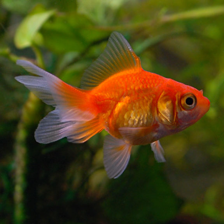

In [3]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [4]:
gold_fish=np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [11]:
classifier.predict(gold_fish[np.newaxis,])

1/1 [==============================] - 0s 53ms/step


array([[ 0.22101453,  2.0474908 ,  9.622563  , ..., -1.462158  ,
        -0.28146482, -0.25984842]], dtype=float32)

In [7]:
result=classifier.predict(gold_fish[np.newaxis,])

1/1 [==============================] - 0s 85ms/step


In [8]:
result.shape

(1, 1001)

In [10]:
result.argmax()

2

In [22]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [23]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [24]:
image_labels[predicted_label_index]

'goldfish'

In [25]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [26]:
data_dir

'.\\datasets\\flower_photos'

In [27]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [28]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [29]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [30]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

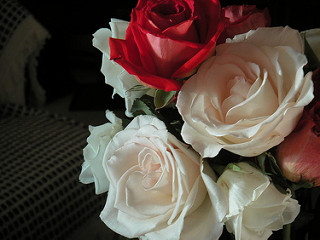

In [34]:
PIL.Image.open(str(roses[1]))

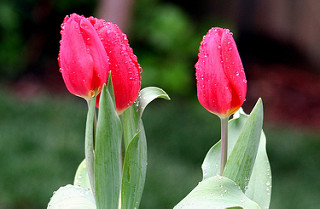

In [35]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [36]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [37]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [38]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [39]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [40]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [41]:

img.shape

(240, 179, 3)

In [42]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [43]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [44]:
X = np.array(X)
y = np.array(y)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [46]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [47]:
X[0].shape

(224, 224, 3)

In [48]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [49]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

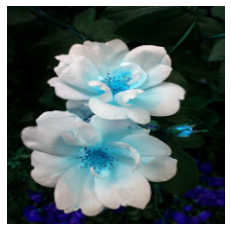

In [50]:
plt.axis('off')
plt.imshow(X[0])

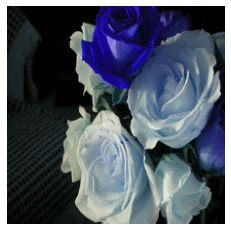

In [51]:
plt.axis('off')
plt.imshow(X[1])

In [52]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 2s 2s/step


array([795, 880, 795], dtype=int64)

In [53]:
image_labels[795]

'shower curtain'

In [54]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [55]:
num_of_flowers=5

model=tf.keras.Sequential([
    
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
    
    
    
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [56]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 131s 1s/step - loss: 0.8061 - acc: 0.6969
Epoch 2/5
86/86 [==============================] - 91s 1s/step - loss: 0.4212 - acc: 0.8521
Epoch 3/5
86/86 [==============================] - 75s 870ms/step - loss: 0.3312 - acc: 0.8888
Epoch 4/5
86/86 [==============================] - 72s 833ms/step - loss: 0.2687 - acc: 0.9099
Epoch 5/5
86/86 [==============================] - 71s 825ms/step - loss: 0.2331 - acc: 0.9299
